<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Computer-Vision/blob/main/2348505_CV_CIA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

**1. Illustrate correlation and convolution operation for the following kernels Using filter2D function**

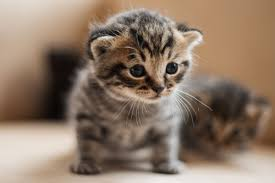

In [2]:
image = cv2.imread("/content/img4.jpeg")
cv2_imshow(image)

**Box Blur Kernel**

(-0.5, 274.5, 182.5, -0.5)

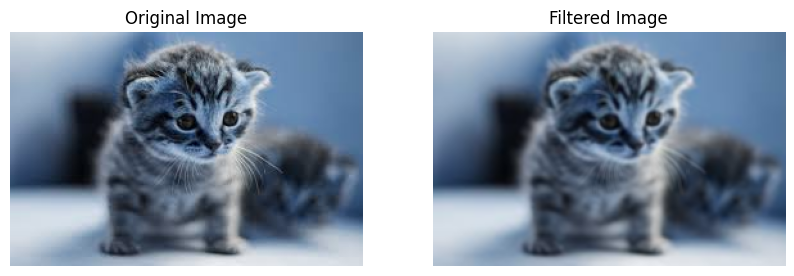

In [3]:
kernel = np.array([[1/9,1/9,1/9],
                   [1/9,1/9,1/9],
                   [1/9,1/9,1/9]])
filtered_image = cv2.filter2D(image,kernel=kernel,ddepth=-1)
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(image,"gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(filtered_image)
plt.title("Filtered Image")
plt.axis("off")

**Edge Detection Kernel**

(-0.5, 274.5, 182.5, -0.5)

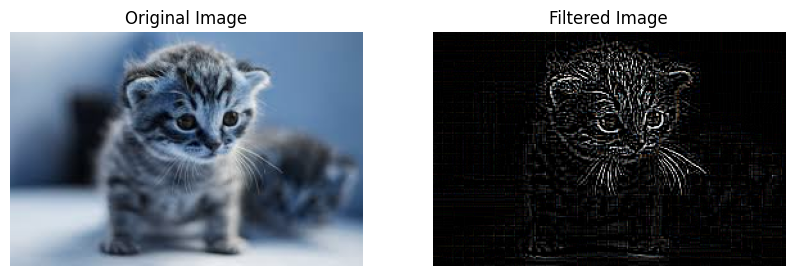

In [4]:
kernel = np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]])
filtered_image = cv2.filter2D(image,kernel=kernel,ddepth=-1)
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(image,"gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(filtered_image)
plt.title("Filtered Image")
plt.axis("off")

**2. Illustrate &quot;Fourier Transform&quot; to decompose an image into its sine and cosine components and apply the following filters in frequency domain**

**i) Ideal Low Pass Filter**

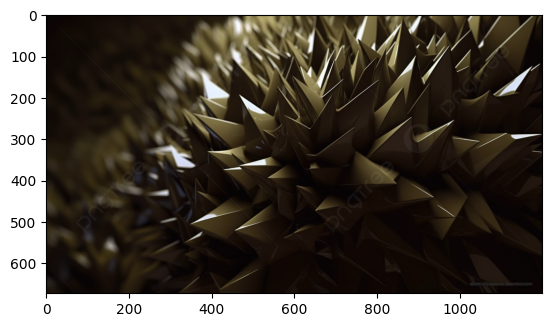

In [5]:
#Reading the Image
image = cv2.imread("/content/img11.jpg")
plt.imshow(image,"gray")

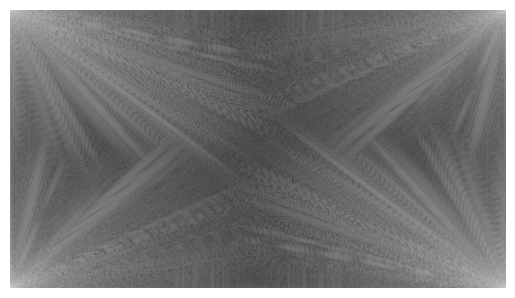

In [6]:
# Converting the image to frequency domain using Forier Transform
f = cv2.imread("/content/img11.jpg",0)
F = np.fft.fft2(f)
plt.imshow(np.log1p(np.abs(F)),cmap="gray")
plt.axis("off")
plt.show()

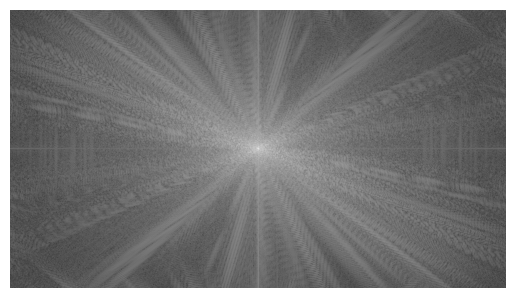

In [7]:
# Shifiting low frequency component to center of the image
Fshift = np.fft.fftshift(F)
#calculate the magnitude of the Fourier Transform used to visualize the frequency content of an image
plt.imshow(np.log1p(np.abs(Fshift)),cmap="gray")
plt.axis("off")
plt.show()

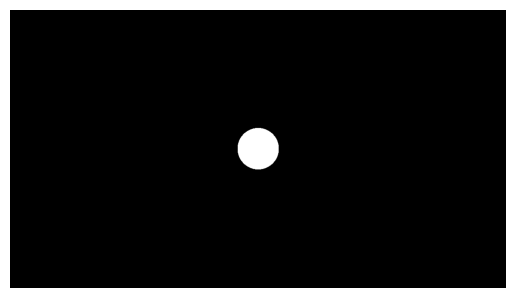

In [8]:
# Creating Ideal Low pass filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50
for u in range(M):
  for v in range(N):
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    if D <= D0:
      H[u,v] = 1
    else:
      H[u,v] = 0

plt.imshow(H, cmap="gray")
plt.axis("off")
plt.show()

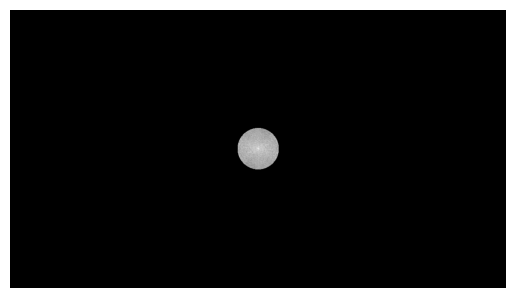

In [9]:
# Multiplying the Filter with pixel values
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap="gray")
plt.axis("off")
plt.show()

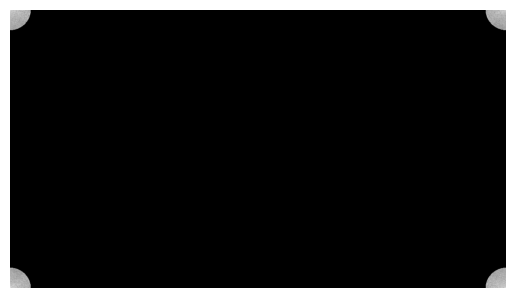

In [10]:
# Invert the shifted Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap="gray")
plt.axis("off")
plt.show()

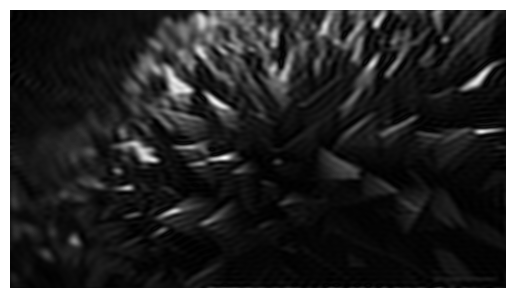

In [12]:
# Apply Ideal Low pass Filtering
g1 = np.abs(np.fft.ifft2(G))
plt.imshow(g1, cmap="gray")
plt.axis("off")
plt.show()

**Ideal High Pass Filter**

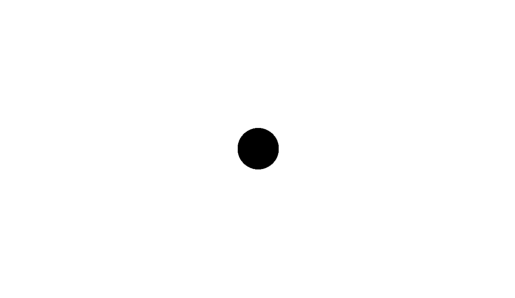

In [13]:
# Creating High pass filter
H = 1 - H
plt.imshow(H, cmap="gray")
plt.axis("off")
plt.show()

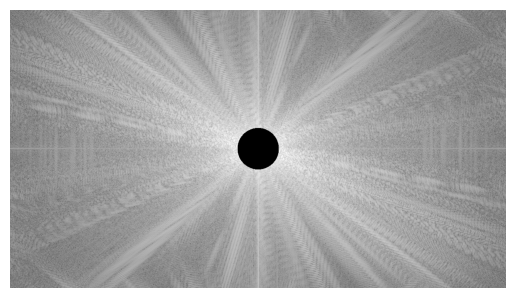

In [14]:
# Creating Ideal High Pass Filter
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap="gray")
plt.axis("off")
plt.show()

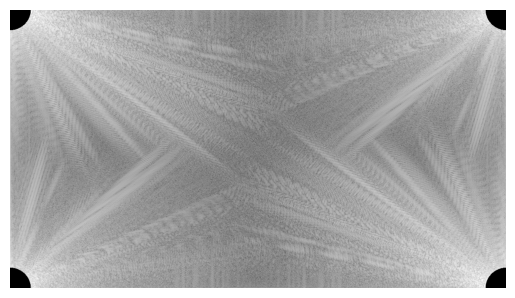

In [15]:
# Shifting the filter to the corners
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap="gray")
plt.axis("off")
plt.show()

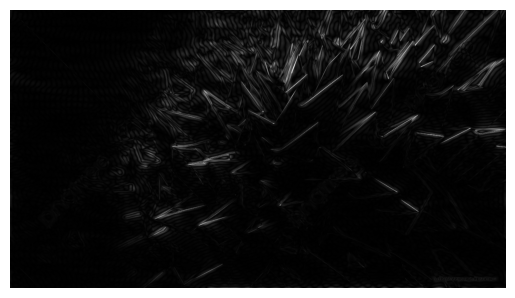

In [17]:
# Applying High Pass Filtering to my input Image
g2 = np.abs(np.fft.ifft2(G))
plt.imshow(g2, cmap="gray")
plt.axis("off")
plt.show()

**Comparison**

Ideal Low Pass Filter retains the low frequency components of our image. As a result of which, it helps in smoothening and blurring the image

Ideal High Pass Filter retains the high frequency components of our image, which usually indicates the edges in our image, as a result, it helps in edge detection.

(-0.5, 1199.5, 672.5, -0.5)

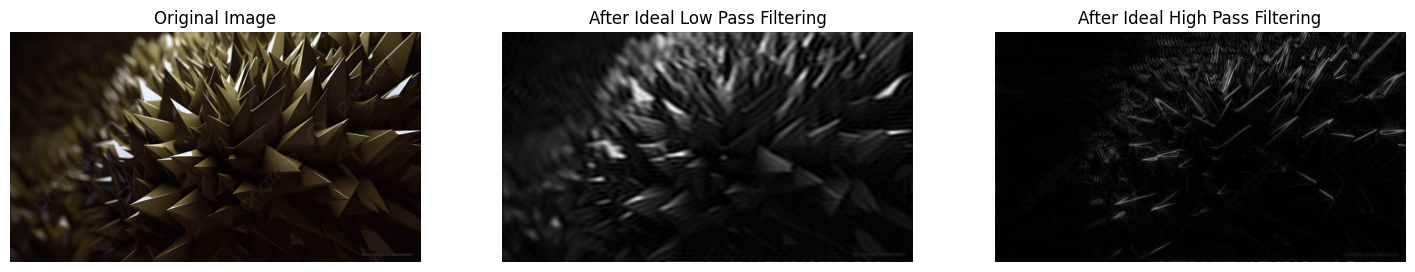

In [21]:
plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
plt.imshow(image,"gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(g1,"gray")
plt.title("After Ideal Low Pass Filtering")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(g2,"gray")
plt.title("After Ideal High Pass Filtering")
plt.axis("off")